# Execute the code below

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
link = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather2019.csv"
df_weather = pd.read_csv(link)

In [2]:
df_weather.head(3)

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,...,WINDTEMP_MAX_C,WEATHER_CODE_MORNING,WEATHER_CODE_NOON,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,OPINION,MONTH,DAY
0,2019-01-01,9,4,10,4,7,8,0.2,94,9.0,...,3,116,143,176,0,1,5.1,very bad,1,1
1,2019-01-02,8,5,18,7,7,5,0.0,90,9.0,...,3,119,116,116,0,1,8.7,very bad,1,2
2,2019-01-03,6,0,18,0,4,3,0.0,88,10.0,...,-4,116,116,116,0,1,8.7,very bad,1,3


# Multivariate linear regression with Scikit-Learn

The equation of an univariate linear regresion is a line : aX +b

The equation of a multivariate linear regression with 2 variables is a plan : aW + bX + c

The equation of a multivariate linear regression with n variables is a hyperplan : a1 X1 + a2 X2 + .... + an Xn + b


## Let's start with 2 variables
With Plotly express, show a [3D scatterplot ](https://plotly.com/python/plotly-express/#3d-coordinates)with :
- X-axis : MAX temperature
- Y-axis : MIN temperature
- Z-axis : Sunhours


In [3]:
# Complete x, y and z in the script below:
px.scatter_3d(x = 'MAX_TEMPERATURE_C',
              y = 'MIN_TEMPERATURE_C',
              z= 'SUNHOUR',
              color='OPINION',
              data_frame=df_weather)


Is it hard to read the 3D scatterplot ? You can move it with your mouse.

### Let's predict
You have to predict the MAX temperature from 2 variables :
- MIN temperature
- Sunhours

Hey, it's the reason why X has 2 brackets and is uppercase and y has a simple bracket and is lowercase . It can take multiple variables (X) to predict only one target (y).

**Remember to save the result of your prediction in a new column 'predict'.**

In [4]:
# Your code here :
from sklearn.linear_model import LinearRegression
X = df_weather[['MIN_TEMPERATURE_C', 'SUNHOUR']]
y = df_weather['MAX_TEMPERATURE_C']

modelLR = LinearRegression().fit(X, y)
print("coefficient :",modelLR.coef_)
print("interception :",modelLR.intercept_)

df_weather['PREDICT'] = modelLR.predict(df_weather[['MIN_TEMPERATURE_C','SUNHOUR']])


coefficient : [0.98867383 0.66222402]
interception : 1.64888373125968


In [5]:
df_weather

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,...,WEATHER_CODE_MORNING,WEATHER_CODE_NOON,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,OPINION,MONTH,DAY,PREDICT
0,2019-01-01,9,4,10,4,7,8,0.2,94,9.000,...,116,143,176,0,1,5.1,very bad,1,1,8.980922
1,2019-01-02,8,5,18,7,7,5,0.0,90,9.000,...,119,116,116,0,1,8.7,very bad,1,2,12.353602
2,2019-01-03,6,0,18,0,4,3,0.0,88,10.000,...,116,116,116,0,1,8.7,very bad,1,3,7.410233
3,2019-01-04,5,-1,15,-1,4,3,0.0,91,10.000,...,116,116,122,0,1,5.1,very bad,1,4,4.037552
4,2019-01-05,6,-1,8,-1,4,3,0.0,91,8.000,...,143,116,116,0,1,8.7,very bad,1,5,6.421559
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2019-12-27,13,10,13,10,12,11,0.0,96,7.375,...,119,143,116,0,1,8.7,not good not bad,12,27,17.296971
361,2019-12-28,11,5,12,7,8,8,0.0,93,7.625,...,143,116,116,0,1,6.9,very bad,12,28,11.161599
362,2019-12-29,9,2,11,3,6,7,0.0,86,10.000,...,116,116,116,0,1,8.7,very bad,12,29,9.387580
363,2019-12-30,12,4,7,5,9,9,0.0,61,10.000,...,113,113,113,0,1,8.7,very bad,12,30,11.364928


### Let's visualize
With Plotly express, show a 3D scatterplot with :

- X-axis : your new 'predict' column
- Y-axis : MIN temperature
- Z-axis : Sunhours



In [6]:
# Your code here :

px.scatter_3d(x = 'PREDICT',
              y = 'MIN_TEMPERATURE_C',
              z= 'SUNHOUR',
              color='OPINION',
              data_frame=df_weather)


**Move the cube with your mouse. Hey your 3D-scatterplot has a special shape : it's a plan !**

## Multivariate linear regressions with N-variables
Make a prediction with the maximum number of variables. But beware :
- variables must be numeric
- your target (MAX temperature) should not be present in variables

Store your prediction in a new column 'predict2'.

In our 3D human vision, we can't represent a hyperplan. But, let's trust in our computer, it can calculate. So trust it and show a simple scatterplot with :
- X-axis : Date
- Y-axis : MAX temperatures in blue dots and 'predict2' in orange dots

Expected result:

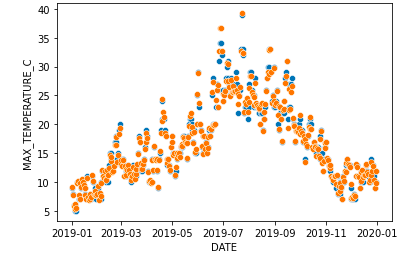

In [7]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DATE                    365 non-null    object 
 1   MAX_TEMPERATURE_C       365 non-null    int64  
 2   MIN_TEMPERATURE_C       365 non-null    int64  
 3   WINDSPEED_MAX_KMH       365 non-null    int64  
 4   TEMPERATURE_MORNING_C   365 non-null    int64  
 5   TEMPERATURE_NOON_C      365 non-null    int64  
 6   TEMPERATURE_EVENING_C   365 non-null    int64  
 7   PRECIP_TOTAL_DAY_MM     365 non-null    float64
 8   HUMIDITY_MAX_PERCENT    365 non-null    int64  
 9   VISIBILITY_AVG_KM       365 non-null    float64
 10  PRESSURE_MAX_MB         365 non-null    int64  
 11  CLOUDCOVER_AVG_PERCENT  365 non-null    float64
 12  HEATINDEX_MAX_C         365 non-null    int64  
 13  DEWPOINT_MAX_C          365 non-null    int64  
 14  WINDTEMP_MAX_C          365 non-null    in

In [15]:
# Your code here :
X_bis = df_weather[['MIN_TEMPERATURE_C','WINDSPEED_MAX_KMH','TEMPERATURE_MORNING_C','TEMPERATURE_NOON_C','TEMPERATURE_EVENING_C','PRECIP_TOTAL_DAY_MM','HUMIDITY_MAX_PERCENT',
                 'VISIBILITY_AVG_KM','PRESSURE_MAX_MB','CLOUDCOVER_AVG_PERCENT','HEATINDEX_MAX_C','DEWPOINT_MAX_C','WINDTEMP_MAX_C','WEATHER_CODE_MORNING','WEATHER_CODE_NOON',
                 'WEATHER_CODE_EVENING','TOTAL_SNOW_MM','UV_INDEX','SUNHOUR','MONTH','DAY']]
y_bis = df_weather['MAX_TEMPERATURE_C']

model = LinearRegression().fit(X_bis, y_bis)

df_weather['PREDICT2'] = model.predict(X_bis)

#model.predict(X_bis)

In [16]:
df_weather['DATE']= pd.to_datetime(df_weather['DATE'])

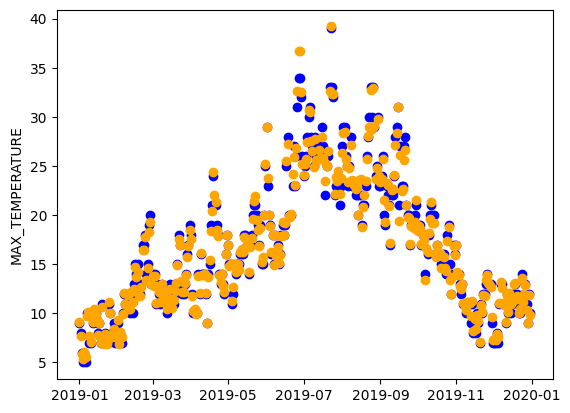

In [10]:
plt.scatter(data = df_weather, x='DATE', y='MAX_TEMPERATURE_C', c= 'Blue')
plt.scatter(data = df_weather, x='DATE', y= 'PREDICT2', c= 'ORANGE')
plt.ylabel('MAX_TEMPERATURE')


plt.show()

In [11]:
df_weather

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,...,WEATHER_CODE_NOON,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,OPINION,MONTH,DAY,PREDICT,PREDICT2
0,2019-01-01,9,4,10,4,7,8,0.2,94,9.000,...,143,176,0,1,5.1,very bad,1,1,8.980922,9.083825
1,2019-01-02,8,5,18,7,7,5,0.0,90,9.000,...,116,116,0,1,8.7,very bad,1,2,12.353602,7.723627
2,2019-01-03,6,0,18,0,4,3,0.0,88,10.000,...,116,116,0,1,8.7,very bad,1,3,7.410233,5.875397
3,2019-01-04,5,-1,15,-1,4,3,0.0,91,10.000,...,116,122,0,1,5.1,very bad,1,4,4.037552,5.345425
4,2019-01-05,6,-1,8,-1,4,3,0.0,91,8.000,...,116,116,0,1,8.7,very bad,1,5,6.421559,6.098643
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2019-12-27,13,10,13,10,12,11,0.0,96,7.375,...,143,116,0,1,8.7,not good not bad,12,27,17.296971,12.906794
361,2019-12-28,11,5,12,7,8,8,0.0,93,7.625,...,116,116,0,1,6.9,very bad,12,28,11.161599,10.381514
362,2019-12-29,9,2,11,3,6,7,0.0,86,10.000,...,116,116,0,1,8.7,very bad,12,29,9.387580,8.986705
363,2019-12-30,12,4,7,5,9,9,0.0,61,10.000,...,113,113,0,1,8.7,very bad,12,30,11.364928,11.907553


You can read coefficient for each column with the attribute `.coef_`. Which column has the biggest coefficient ?

In [17]:
# Your code here :
#column_name, column_coef

max = 0

for i, j in zip (X_bis.columns, model.coef_):
  print(i)
  print(j)
  if abs(j) > max:
    max = abs(j)
    col_max = i
print(f'le coefficient max est de {max}, pour la colonne {col_max}')


MIN_TEMPERATURE_C
0.06144011191801986
WINDSPEED_MAX_KMH
-0.002823928363796635
TEMPERATURE_MORNING_C
-0.08779579916589356
TEMPERATURE_NOON_C
0.19104164711089813
TEMPERATURE_EVENING_C
0.17694033106464752
PRECIP_TOTAL_DAY_MM
0.005048342612074315
HUMIDITY_MAX_PERCENT
-0.0025288871778320087
VISIBILITY_AVG_KM
0.010042909338620948
PRESSURE_MAX_MB
-0.0005833804233853886
CLOUDCOVER_AVG_PERCENT
-0.005793786341190961
HEATINDEX_MAX_C
0.5842807479084103
DEWPOINT_MAX_C
-0.03418089114194214
WINDTEMP_MAX_C
0.05221594780580942
WEATHER_CODE_MORNING
0.0005299146586754064
WEATHER_CODE_NOON
9.325673998804595e-05
WEATHER_CODE_EVENING
-0.00021177678205335914
TOTAL_SNOW_MM
5.551115123125783e-17
UV_INDEX
-0.02829646663345561
SUNHOUR
-0.01729437874494633
MONTH
0.010717391001480083
DAY
-0.0013309235416138643
le coefficient max est de 0.5842807479084103, pour la colonne HEATINDEX_MAX_C


In [21]:
model.score(X_bis,y)

0.994053439074215

In [ ]:
###############################################################################################################

In [ ]:
#pour moi

In [ ]:
types = df_weather.dtypes
types
column = types[types.values != 'object'].index
column
liste_finale=[]
for i in column :
  if i != 'MAX_TEMPERATURE_C' and i != 'PREDICT' and i != 'PREDICT2':
    liste_finale.append(i)
print(liste_finale)

In [ ]:
# Your code here :
X =df_weather[liste_finale]
y = df_weather['MAX_TEMPERATURE_C']
model2 = LinearRegression().fit(X, y)
df_weather['PREDICT2'] = model2.predict(df_weather[liste_finale])

In [ ]:
df_weather['DATE'] = pd.to_datetime(df_weather['DATE'])

In [ ]:
ax = sns.scatterplot(data = df_weather,
                     x= 'DATE',
                     y = 'MAX_TEMPERATURE_C',
                     color = 'blue',
                     label = 'Measured')
ax = sns.scatterplot(data = df_weather,
                     x= 'DATE',
                     y = 'PREDICT2',
                     color = 'orange',
                     label = 'Calculated')

In [ ]:
# Your code here :
max_name, max_coeff = '', 0
for name_column, coeff_column in zip (X.columns, model2.coef_):
  if abs(coeff_column) > max_coeff :
    max_coeff = coeff_column
    max_name = name_column
  print(name_column, round(coeff_column, 3))

print(f"Le coefficient max est de {round(max_coeff, 3)} et c'est la colonne {max_name}")

print(model2.score(X, y))

In [ ]:
df = df_weather.select_dtypes(['int','float']).drop(columns = 'MAX_TEMPERATURE_C')
liste_columns = df.columns.to_list()

X = df_weather[liste_columns]
y = df_weather['MAX_TEMPERATURE_C']

model = LinearRegression().fit(X,y)

df_weather['Predict1'] = model.predict(df_weather[liste_columns])


px.scatter_3d(x = 'Predict1',
              y = 'MIN_TEMPERATURE_C',
              z= 'SUNHOUR',
              data_frame=df_weather)

In [18]:
max = 0
for i, j in zip(liste_columns, model.coef_):
  print(i,j,'\n')
  if j>max:
    values = [i, j]
    max = j

print('Le plus grand coeff est : ',values[0], ' avec ', values[1])

NameError: ignored